## 1. Project overvieuw

Football injuries have a major impact on team performance, player availability, and club financial planning. This project aims to analyze and predict player injuries using a combination of performance data, injury history, player profiles, and transfer information.




🎯 Project Goals

Understand patterns and trends in football injuries.

Explore how factors such as age, playing time, position, or past injuries influence the risk and severity of new injuries.

Build predictive features that could help identify players at higher risk.

Provide insights that support player management and decision-making.




📂 Datasets Used

The project is based on four key datasets:

Player Injuries: detailed records of injury type, duration, and recovery.

Player Performance: match statistics and playing minutes over time.

Player Profiles: age, position, physical attributes, and other demographic information.

Transfer Data: club history, transfer dates, and player market information.




🛠️ Workflow

Load and validate datasets to ensure structural consistency.

Clean and preprocess data (missing values, datatypes, deduplication).

Engineer meaningful features (injury frequency, durations, workload indicators).

Conduct exploratory analysis to uncover trends and relationships.

Summarize insights that can support football analysts and managers.




📌 Expected Outcomes

Clean, structured datasets suitable for modeling.

A set of data-driven insights on how and why injuries occur.

A foundation for developing early injury prediction tools that can be used in real life scenarios.

## 2. Problem Definition,  Use Cases and target variable.

This project aims to predict whether a professional football player is likely to sustain an injury in the upcoming season.

### Use Case
The model is designed to support medical and performance staff during pre-season planning. By identifying players at elevated injury risk before the start of a new season, clubs can:
- adapt training loads,
- increase medical monitoring for high-risk players,
- inform squad rotation and depth planning.

The model is not intended to replace medical judgement, but to act as an early-warning decision support tool.

### Prediction Timing
All predictions are generated at the end of season *t*, using information available up to that point, to estimate injury risk during season *t+1*. "t+1" means the next season. For example Features from the 2020 season are used to predict whether the player is injured at any point during the 2021 season.

### Sucess criteria

The model will prioritize recall as the most important metric. This is because the model cant afford to miss high risk players.

## target variable defenition

The objective of this project is to predict whether a player will sustain an injury in the **following season (t+1). This is based solely on information available up to the end of the **current season (t).

This reflects a realistic operational scenario where injury risk is assessed at the end of a season to inform preseason planning, training load management, and squad decisions.



## 3. Data loading

In [67]:
# --- LOAD DATASETS FROM GOOGLE DRIVE ---
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

# Path to your dataset folder
DATA_PATH = "/content/drive/MyDrive/AISemester/dataset persoonlijk project/"

# List all CSV files in folder
files = [f for f in os.listdir(DATA_PATH) if f.endswith(".csv")]
files


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['player_injuries.csv',
 'player_performances.csv',
 'player_profiles.csv',
 'transfer_history.csv']

### Player_injuries data dict



**Description**  
This dataset contains rows of players that suffered from an injury. Some players show up multiple times.

**Granularity**  
each row represents an injury that a player has suffered.


#### Key Variables

| Column  | Description
|player_id|unique identifier for each player
|season_name|Season identifier (22/23)
|Injury_reason|Text description of how injury has occured
|from_date|injury start date
|end_date|When a player has returned
|Days_missed|Total number of days missed due to injury
|games_missed|Number of matches missed due to injury


#### Data Quality Assumptions
- Minor injuries may be underreported, as the dataset relies on publicly available records.
- Injury durations are assumed to be fully captured by from_date and end_date.


### Player_performances data dict

Description
This dataset contains rows of players that participated in football matches across multiple seasons and competitions. Some players show up multiple times within the same season.

Granularity
each row represents a match that a player has participated in.

### Key Variables

| Column | Description |
|player_id|unique identifier for each player|
|season_name|Season identifier (e.g. 24/25)|
|competition_id|unique identifier for each competition|
|competition_name|Name of the competition|
|team_id|unique identifier for each team|
|team_name|Name of the team the player represented in the match|
|nb_in_group|Number of players included in the matchday squad|
|nb_on_pitch|Number of players on the pitch during the player’s participation|
|goals|Number of goals scored by the player|
|assists|Number of assists provided by the player|
|own_goals|Number of own goals conceded by the player|
|subed_in|Indicator for whether the player was substituted into the match|
|subed_out|Indicator for whether the player was substituted out of the match|
|yellow_cards|Number of yellow cards received|
|second_yellow_cards|Number of second yellow cards received|
|direct_red_cards|Number of direct red cards received|
|penalty_goals|Number of goals scored from penalties|
|minutes_played|Total minutes played in the match|
|goals_conceded|Number of goals conceded while the player was on the pitch|
|clean_sheets|Indicator for whether the team kept a clean sheet|

### Data Quality Assumptions

Matches in which a player did not appear are not included in the dataset.

Minutes played may be zero for unused substitutes.

Players who transfer mid-season may appear under multiple teams within the same season.

Team-level outcomes (e.g. clean sheets, goals conceded) are attributed to the player’s match participation.

Some contextual variables may vary in definition depending on the competition or data source.

### Player_profiles data dict

Description
This dataset contains static profile information for football players, including personal details, positional information, and contract-related attributes. Each player appears once in the dataset.

Granularity
each row represents a single player.

## Key Variables

| Column | Description |
|player_id|unique identifier for each player|
|player_slug|URL-friendly identifier for the player|
|player_name|Full name of the player|
|player_image_url|URL linking to the player’s profile image|
|name_in_home_country|Player name written in their home country language|
|date_of_birth|Player’s date of birth|
|place_of_birth|City or place where the player was born|
|country_of_birth|Country where the player was born|
|height|Player height in centimeters|
|citizenship|Player nationality or citizenship|
|is_eu|Indicator for whether the player holds EU citizenship|
|position|General playing position (e.g. Defender, Midfielder)|
|main_position|Primary playing position|
|foot|Preferred foot (left, right, both)|
|current_club_id|unique identifier for the player’s current club|
|current_club_name|Name of the player’s current club|
|joined|Date the player joined the current club|
|contract_expires|Contract expiration date|
|outfitter|Sportswear outfitter or sponsor|
|social_media_url|Link to the player’s social media profile|
|player_agent_id|unique identifier for the player’s agent|
|player_agent_name|Name of the player’s agent|
|contract_option|Indicator for whether the contract includes an option|
|date_of_last_contract_extension|Date of the most recent contract extension|
|on_loan_from_club_id|unique identifier for the parent club if the player is on loan|
|on_loan_from_club_name|Name of the parent club if the player is on loan|
|contract_there_expires|Contract expiration date at the parent club|
|second_club_url|URL of the second most recent club|
|second_club_name|Name of the second most recent club|
|third_club_url|URL of the third most recent club|
|third_club_name|Name of the third most recent club|
|fourth_club_url|URL of the fourth most recent club|
|fourth_club_name|Name of the fourth most recent club|
|date_of_death|Date of death (if applicable)|

## Data Quality Assumptions

Each player appears once in the dataset.

Contract-related dates are assumed to be accurate at the time of data collection.

Historical club information may be incomplete for some players.

Social media and outfitter information may be missing or outdated.

Date of death is only populated for deceased players.

### Player_transfers data dict

Description
This dataset contains rows of player transfer events between football clubs across multiple seasons. Some players show up multiple times if they have transferred more than once.

Granularity
each row represents a transfer that a player has completed.

### Key Variables

| Column | Description |
|player_id|unique identifier for each player|
|season_name|Season identifier (e.g. 24/25)|
|transfer_date|Date on which the transfer occurred|
|from_team_id|unique identifier for the player’s previous team|
|from_team_name|Name of the player’s previous team|
|to_team_id|unique identifier for the player’s new team|
|to_team_name|Name of the player’s new team|
|transfer_type|Type of transfer (e.g. permanent, loan, free)|
|value_at_transfer|Estimated market value of the player at the time of transfer|
|transfer_fee|Reported transfer fee paid for the player|

### Data Quality Assumptions

Players may appear multiple times if they transfer more than once.

Transfer fees may be missing or undisclosed for some transfers.

Market value estimates are approximate and may vary by source.

Loan transfers may not include a reported transfer fee.

Transfer dates are assumed to reflect the official registration date.

## 4. Data analysis

In [68]:
datasets = {}
for f in files:
    df_name = f.replace(".csv", "")
    df_path = os.path.join(DATA_PATH, f)

    try:
        df = pd.read_csv(df_path, low_memory=False)
        datasets[df_name] = df
        print(f"✅ Loaded: {df_name} → {df.shape}")
    except Exception as e:
        print(f"❌ Could not load {f}: {e}")


✅ Loaded: player_injuries → (77871, 7)
✅ Loaded: player_performances → (760125, 20)
✅ Loaded: player_profiles → (40738, 34)
✅ Loaded: transfer_history → (279164, 10)


Here is assigned variables to have easier acces to my dataset.

In [69]:
inj = datasets["player_injuries"]
perf = datasets["player_performances"]
prof = datasets["player_profiles"]
trans = datasets["transfer_history"]

inj.head(), perf.head(), prof.head(), trans.head()


(   player_id season_name  injury_reason   from_date    end_date  days_missed  \
 0     749087       22/23  Facial injury  2022-09-11  2022-09-21         11.0   
 1     187288       23/24  Muscle injury  2023-12-10  2023-12-25         16.0   
 2     187288       23/24  Muscle injury  2023-11-20  2023-12-05         16.0   
 3     187288       23/24  Muscle injury  2023-08-10  2023-09-05         27.0   
 4     187288       21/22    minor knock  2021-11-25  2021-11-28          4.0   
 
    games_missed  
 0             2  
 1             2  
 2             2  
 3             4  
 4             1  ,
    player_id season_name competition_id        competition_name  team_id  \
 0    1058343       24/25           SCJ2  Supercoppa Primavera 2    17664   
 1    1058343       24/25           IJ2B         Primavera 2 - B    17664   
 2    1058343       24/25           ITJ7                Under 18    75868   
 3    1058343       23/24           ITJF       Under 17 - Finals    48967   
 4    105834

Here I did a basic integrity check. This ensures that all datasets have the expected key. The output should return true. This means that everything has been loaded correctly.

In [70]:
# This is something that could be added tho check duplicates, missing values & datatypes.
# df.isna().mean().sort_values(ascending=False).head()


datasets_valid = all("player_id" in df.columns for df in datasets.values())
datasets_valid


True

Here I inspect the basic structure of all 4 datasets to understand the setup. This analysis forms the foundation for the cleaning and feature engineering steps that follow.

In [71]:
# Overview: rows, columns, dtypes
def df_overview(name, df):
    print(f"\n=== {name.upper()} ===")
    print(f"Shape: {df.shape}")
    display(df.head(3))
    display(df.tail(3))
    print("\nDtypes:")
    display(df.dtypes)
    print("\nMissing value % (top 15):")
    display((df.isna().mean().sort_values(ascending=False).head(15) * 100).round(1))

df_overview("injuries", inj)
df_overview("performances", perf)
df_overview("profiles", prof)
df_overview("transfers", trans)



=== INJURIES ===
Shape: (77871, 7)


,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed
0,749087,22/23,Facial injury,2022-09-11,2022-09-21,11.0,2
1,187288,23/24,Muscle injury,2023-12-10,2023-12-25,16.0,2
2,187288,23/24,Muscle injury,2023-11-20,2023-12-05,16.0,2


,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed
77868,93936,12/13,Shin injury,2012-09-04,2012-10-20,47.0,11
77869,93936,11/12,Shin injury,2011-09-05,2011-10-05,31.0,5
77870,93936,11/12,Bone inflammation,2011-09-03,2012-01-15,135.0,24



Dtypes:


,0
player_id,int64
season_name,object
injury_reason,object
from_date,object
end_date,object
days_missed,float64
games_missed,int64



Missing value % (top 15):


,0
end_date,1.4
from_date,0.1
days_missed,0.1
injury_reason,0.0
season_name,0.0
player_id,0.0
games_missed,0.0



=== PERFORMANCES ===
Shape: (760125, 20)


,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
0,1058343,24/25,SCJ2,Supercoppa Primavera 2,17664,Frosinone Primavera,1,1,0.0,0,0,0,1,0,0,0,0,NaN,0,0
1,1058343,24/25,IJ2B,Primavera 2 - B,17664,Frosinone Primavera,15,12,0.0,0,0,2,2,1,0,0,0,NaN,0,0
2,1058343,24/25,ITJ7,Under 18,75868,Inter Under 18,15,10,0.0,0,0,6,1,1,0,0,0,NaN,0,0


,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
760122,706797,20/21,CITP,Coppa Primavera,16996,Hellas Verona Primavera,5,4,NaN,0,0,0,0,0,0,0,0,450.0,6,2
760123,706797,19/20,CITP,Coppa Primavera,16996,Hellas Verona Primavera,5,5,NaN,0,0,0,1,1,0,0,0,434.0,9,0
760124,706797,19/20,IJ2A,Primavera 2 - A,16996,Hellas Verona Primavera,16,5,NaN,0,0,0,0,0,0,0,0,450.0,4,2



Dtypes:


,0
player_id,int64
season_name,object
competition_id,object
competition_name,object
team_id,int64
team_name,object
nb_in_group,int64
nb_on_pitch,int64
goals,float64
assists,int64



Missing value % (top 15):


,0
minutes_played,62.1
goals,7.9
player_id,0.0
season_name,0.0
competition_name,0.0
competition_id,0.0
nb_in_group,0.0
team_id,0.0
nb_on_pitch,0.0
assists,0.0



=== PROFILES ===
Shape: (40738, 34)


,player_id,player_slug,player_name,player_image_url,name_in_home_country,date_of_birth,place_of_birth,country_of_birth,height,citizenship,...,on_loan_from_club_id,on_loan_from_club_name,contract_there_expires,second_club_url,second_club_name,third_club_url,third_club_name,fourth_club_url,fourth_club_name,date_of_death
0,1058343,alessandro-luchetti,Alessandro Luchetti (1058343),https://img.a.transfermarkt.technology/portrai...,NaN,2007-05-28,Alzano Lombardo,Italy,0.0,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410547,david-hickson,David Hickson (410547),https://img.a.transfermarkt.technology/portrai...,David Hickson Gyedu,1997-07-09,Oslo,Norway,180.0,Norway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749087,erzhan-tokotaev,Erzhan Tokotaev (749087),https://img.a.transfermarkt.technology/portrai...,Токотаев Эржан,2000-07-17,Bishkek,Kyrgyzstan,189.0,Kyrgyzstan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,player_id,player_slug,player_name,player_image_url,name_in_home_country,date_of_birth,place_of_birth,country_of_birth,height,citizenship,...,on_loan_from_club_id,on_loan_from_club_name,contract_there_expires,second_club_url,second_club_name,third_club_url,third_club_name,fourth_club_url,fourth_club_name,date_of_death
40735,244175,marco-albertoni,Marco Albertoni (244175),https://img.a.transfermarkt.technology/portrai...,NaN,1995-08-05,Genova,Italy,188.0,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40736,450195,amar-catic,Amar Catic (450195),https://img.a.transfermarkt.technology/portrai...,Amar Ćatić,1999-01-21,Tilburg,Bosnia-Herzegovina,178.0,Bosnia-Herzegovina Netherlands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40737,774165,iker-villar,Iker Villar (774165),https://img.a.transfermarkt.technology/portrai...,Iker Villar Mendoza,2006-01-10,Fuentes de Andalucía,Spain,183.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dtypes:


,0
player_id,int64
player_slug,object
player_name,object
player_image_url,object
name_in_home_country,object
date_of_birth,object
place_of_birth,object
country_of_birth,object
height,float64
citizenship,object



Missing value % (top 15):


,0
fourth_club_url,100.0
fourth_club_name,100.0
date_of_death,100.0
third_club_url,99.9
third_club_name,99.9
second_club_url,96.7
second_club_name,96.7
contract_there_expires,95.7
on_loan_from_club_id,93.0
on_loan_from_club_name,93.0



=== TRANSFERS ===
Shape: (279164, 10)


,player_id,season_name,transfer_date,from_team_id,from_team_name,to_team_id,to_team_name,transfer_type,value_at_transfer,transfer_fee
0,1058343,24/25,2025-01-25,75868,Inter U18,17664,Frosinone U19,Transfer,0,0
1,1058343,24/25,2024-07-01,48967,Inter U17,75868,Inter U18,Transfer,0,0
2,1058343,23/24,2023-07-01,24432,Inter Youth,48967,Inter U17,Transfer,0,0


,player_id,season_name,transfer_date,from_team_id,from_team_name,to_team_id,to_team_name,transfer_type,value_at_transfer,transfer_fee
279161,1188592,24/25,2024-07-01,49745,Sampdoria U17,12001,Sampdoria U20,Transfer,0,0
279162,706797,21/22,2021-07-29,16996,Verona U19,11669,Cádiz CF B,Transfer,50000,0
279163,706797,19/20,2019-07-01,14920,Hellas Verona Y,16996,Verona U19,Transfer,0,0



Dtypes:


,0
player_id,int64
season_name,object
transfer_date,object
from_team_id,int64
from_team_name,object
to_team_id,int64
to_team_name,object
transfer_type,object
value_at_transfer,int64
transfer_fee,int64



Missing value % (top 15):


,0
transfer_date,0.1
player_id,0.0
season_name,0.0
from_team_id,0.0
from_team_name,0.0
to_team_id,0.0
to_team_name,0.0
transfer_type,0.0
value_at_transfer,0.0
transfer_fee,0.0


Before combining datasets I checked the following things:

- counting the numbers of students
- Measuirng overlap between dataset
- checking for duplicate rows

In [72]:
import numpy as np

# 1) Unique players per table
def unique_players(df):
    return df["player_id"].nunique() if "player_id" in df.columns else np.nan

print("Unique players:")
print("injuries:", unique_players(inj))
print("performances:", unique_players(perf))
print("profiles:", unique_players(prof))
print("transfers:", unique_players(trans))

# 2) Overlaps
inj_ids  = set(inj["player_id"])
perf_ids = set(perf["player_id"])
prof_ids = set(prof["player_id"])
trans_ids= set(trans["player_id"])

print("\nIntersections:")
print("inj ∩ perf:", len(inj_ids & perf_ids))
print("inj ∩ prof:", len(inj_ids & prof_ids))
print("perf ∩ prof:", len(perf_ids & prof_ids))
print("All four:", len(inj_ids & perf_ids & prof_ids & trans_ids))

# 3) Duplicates
for name, df in [("injuries", inj), ("performances", perf), ("profiles", prof), ("transfers", trans)]:
    print(f"\n{name}: duplicate rows = {df.duplicated().sum()}")


Unique players:
injuries: 17901
performances: 38796
profiles: 40738
transfers: 40102

Intersections:
inj ∩ perf: 17866
inj ∩ prof: 17901
perf ∩ prof: 38796
All four: 17864

injuries: duplicate rows = 55

performances: duplicate rows = 0

profiles: duplicate rows = 0

transfers: duplicate rows = 14


Here I did some data parsing. I converted the datasets format into numeric variable. This makes it easy to order seasons chronically and overall makes my dataset less complex.

In [73]:
import re
import numpy as np

def season_start_year(s):
    """
    Convert football season strings into the starting year.
    Handles cases like:
    - '98/99' → 1998
    - '99/00' → 1999
    - '00/01' → 2000
    - '14/15' → 2014
    - '2021/2022' → 2021
    - '2019' → 2019
    """

    if pd.isna(s):
        return np.nan

    s = str(s).strip()

    # Case 1 — format "22/23", "07/08", "99/00"
    m = re.match(r"^(\d{2})[/-](\d{2})$", s)
    if m:
        yy = int(m.group(1))
        # Football rule:
        # if >= 90 → 1990s, else → 2000s
        return 1900 + yy if yy >= 90 else 2000 + yy

    # Case 2 — full year "2021/2022"
    m = re.match(r"^(\d{4})[/-](\d{2,4})$", s)
    if m:
        return int(m.group(1))

    # Case 3 — single year e.g. "2014"
    if s.isdigit() and 1900 < int(s) < 2100:
        return int(s)

    return np.nan


### Data Quality Assumptions and Limitations

- Injury records depend on reporting quality and may underrepresent minor injuries.
- Players who did not appear in any matches during a season may have incomplete performance data. This is something that I have to take into account.
- Players transferring between teams within a season are assigned to their primary team for that season.
- Some features rely on estimated values (for example matches played inferred from minutes/90).


## 5. Feature Engineering

In [74]:
def null_report(df, top=20):
    nr = df.isna().mean().sort_values(ascending=False) * 100
    return nr.head(top).round(1)

print("Null % — injuries"); display(null_report(inj))
print("\nNull % — performances"); display(null_report(perf))
print("\nNull % — profiles"); display(null_report(prof))
print("\nNull % — transfers"); display(null_report(trans))

# Impact commentary (for your notes in the portfolio):
print("""
Notes:
- High null rates in optional columns will be imputed (median for numeric, most_frequent for categorical).
- We avoid dropna() on the full table to prevent catastrophic row loss.
- Outliers in minutes/goals will be clipped only for plots, never for modelling unless justified.
""")


Null % — injuries


,0
end_date,1.4
from_date,0.1
days_missed,0.1
injury_reason,0.0
season_name,0.0
player_id,0.0
games_missed,0.0



Null % — performances


,0
minutes_played,62.1
goals,7.9
player_id,0.0
season_name,0.0
competition_name,0.0
competition_id,0.0
nb_in_group,0.0
team_id,0.0
nb_on_pitch,0.0
assists,0.0



Null % — profiles


,0
fourth_club_url,100.0
fourth_club_name,100.0
date_of_death,100.0
third_club_url,99.9
third_club_name,99.9
second_club_url,96.7
second_club_name,96.7
contract_there_expires,95.7
on_loan_from_club_id,93.0
on_loan_from_club_name,93.0



Null % — transfers


,0
transfer_date,0.1
player_id,0.0
season_name,0.0
from_team_id,0.0
from_team_name,0.0
to_team_id,0.0
to_team_name,0.0
transfer_type,0.0
value_at_transfer,0.0
transfer_fee,0.0



Notes:
- High null rates in optional columns will be imputed (median for numeric, most_frequent for categorical).
- We avoid dropna() on the full table to prevent catastrophic row loss.
- Outliers in minutes/goals will be clipped only for plots, never for modelling unless justified.



In [75]:
multi_counts = perf.groupby(["player_id","season_name"]).size().value_counts().head(10)
display(multi_counts)

print("""
Conclusion:
- performances contains multiple rows per player-season (e.g., per competition).
- We will aggregate to SEASON LEVEL (sum/mean) in the next section to build features
  that predict injuries in the NEXT season.
""")


,count
2,95019
1,80055
3,67764
4,36485
5,16724
6,6401
7,1964
8,521
9,82
10,12



Conclusion:
- performances contains multiple rows per player-season (e.g., per competition).
- We will aggregate to SEASON LEVEL (sum/mean) in the next section to build features
  that predict injuries in the NEXT season.



Here I create functions that convert dates, numeric collumns and remove duplicates.

In [76]:
import pandas as pd
import numpy as np

# Utility functions
def to_datetime(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors="coerce")

def to_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

def to_string(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype("string")


In this chunck I use the previous functions that I made to clean the injury dataset.

In [77]:
# Standardize injury dataset
to_datetime(inj, ["from_date", "end_date"])
to_numeric(inj, ["days_missed", "games_missed"])
to_string(inj, ["season_name", "injury_reason"])

# Remove impossible or negative durations
inj = inj[inj["days_missed"].fillna(0) >= 0]

# Remove duplicates
inj = inj.drop_duplicates()

print("✅ Injuries cleaned:", inj.shape)
inj.head()


✅ Injuries cleaned: (77816, 7)


,player_id,season_name,injury_reason,from_date,end_date,days_missed,games_missed
0,749087,22/23,Facial injury,2022-09-11,2022-09-21,11.0,2
1,187288,23/24,Muscle injury,2023-12-10,2023-12-25,16.0,2
2,187288,23/24,Muscle injury,2023-11-20,2023-12-05,16.0,2
3,187288,23/24,Muscle injury,2023-08-10,2023-09-05,27.0,4
4,187288,21/22,minor knock,2021-11-25,2021-11-28,4.0,1


Cleaned the performance dataset.

In [78]:
to_string(perf, ["season_name","competition_name","team_name"])
to_numeric(perf, ["minutes_played","goals","assists","own_goals",
                  "yellow_cards","direct_red_cards","second_yellow_cards",
                  "penalty_goals","clean_sheets","goals_conceded",
                  "subed_in","subed_out","nb_in_group","nb_on_pitch"])

perf = perf.drop_duplicates()

print("✅ Performances cleaned:", perf.shape)
perf.head()


✅ Performances cleaned: (760125, 20)


,player_id,season_name,competition_id,competition_name,team_id,team_name,nb_in_group,nb_on_pitch,goals,assists,own_goals,subed_in,subed_out,yellow_cards,second_yellow_cards,direct_red_cards,penalty_goals,minutes_played,goals_conceded,clean_sheets
0,1058343,24/25,SCJ2,Supercoppa Primavera 2,17664,Frosinone Primavera,1,1,0.0,0,0,0,1,0,0,0,0,NaN,0,0
1,1058343,24/25,IJ2B,Primavera 2 - B,17664,Frosinone Primavera,15,12,0.0,0,0,2,2,1,0,0,0,NaN,0,0
2,1058343,24/25,ITJ7,Under 18,75868,Inter Under 18,15,10,0.0,0,0,6,1,1,0,0,0,NaN,0,0
3,1058343,23/24,ITJF,Under 17 - Finals,48967,Inter Under 17,1,0,0.0,0,0,0,0,0,0,0,0,NaN,0,0
4,1058343,23/24,ITJ5,Under 17 - B,48967,Inter Under 17,24,18,0.0,0,0,2,6,1,0,0,0,NaN,0,0


Cleaned the profiles dataset.

In [79]:
# Convert birthdate if present
if "date_of_birth" in prof.columns:
    prof["date_of_birth"] = pd.to_datetime(prof["date_of_birth"], errors="coerce")

# Convert height, weight if present
for col in ["height", "weight"]:
    if col in prof.columns:
        prof[col] = pd.to_numeric(prof[col], errors="coerce")

prof = prof.drop_duplicates()

print("✅ Profiles cleaned:", prof.shape)
prof.head()


✅ Profiles cleaned: (40738, 34)


,player_id,player_slug,player_name,player_image_url,name_in_home_country,date_of_birth,place_of_birth,country_of_birth,height,citizenship,...,on_loan_from_club_id,on_loan_from_club_name,contract_there_expires,second_club_url,second_club_name,third_club_url,third_club_name,fourth_club_url,fourth_club_name,date_of_death
0,1058343,alessandro-luchetti,Alessandro Luchetti (1058343),https://img.a.transfermarkt.technology/portrai...,NaN,2007-05-28,Alzano Lombardo,Italy,0.0,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410547,david-hickson,David Hickson (410547),https://img.a.transfermarkt.technology/portrai...,David Hickson Gyedu,1997-07-09,Oslo,Norway,180.0,Norway,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,749087,erzhan-tokotaev,Erzhan Tokotaev (749087),https://img.a.transfermarkt.technology/portrai...,Токотаев Эржан,2000-07-17,Bishkek,Kyrgyzstan,189.0,Kyrgyzstan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1203026,wilfried-ndollo-bille,Wilfried Ndollo Bille (1203026),https://img.a.transfermarkt.technology/portrai...,NaN,2005-04-15,Mbanga,Cameroon,172.0,Cameroon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,683809,theo-lucbert,Théo Lucbert (683809),https://img.a.transfermarkt.technology/portrai...,NaN,1998-02-04,Bayonne,France,171.0,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean transfer dataset.

In [80]:
# # --- SAFE TRANSFER / MOVEMENT FEATURES (no assumptions about columns) ---
# import numpy as np

# # Ensure columns exist (create safe placeholders if missing)
# for col, default in [
#     ("transfer_type", "Unknown"),
#     ("transfer_fee", np.nan),
#     ("market_value", np.nan),
#     ("team_name", "Unknown"),  # from perf_season; still safeguard
# ]:
#     if col not in df.columns:
#         df[col] = default

# # Sort for lag features
# df = df.sort_values(["player_id", "season_year"]).reset_index(drop=True)

# # Team change between seasons (strong proxy for a transfer/loan)
# df["team_prev"] = df.groupby("player_id")["team_name"].shift(1)
# df["team_changed"] = (df["team_name"] != df["team_prev"]).astype(int).fillna(0).astype(int)

# # Market value change (if available)
# if "market_value" in df.columns and df["market_value"].notna().any():
#     df["market_value_prev"] = df.groupby("player_id")["market_value"].shift(1)
#     df["market_value_change"] = (df["market_value"] - df["market_value_prev"]).fillna(0)
# else:
#     df["market_value_change"] = 0.0

# # Transfer fee presence (if available)
# if "transfer_fee" in df.columns and df["transfer_fee"].notna().any():
#     df["had_transfer_fee"] = (df["transfer_fee"].fillna(0) > 0).astype(int)
# else:
#     df["had_transfer_fee"] = 0

# # Had transfer (robust): team change OR transfer fee evidence
# df["had_transfer"] = ((df["team_changed"] == 1) | (df["had_transfer_fee"] == 1)).astype(int)

# # Categorical safety
# df["transfer_type"] = df["transfer_type"].fillna("Unknown").astype("category")


Here I group_by player_id and season_year and aggregate the sum and mean.

In [81]:
# Ensure season_year exists
perf["season_year"] = perf["season_name"].apply(season_start_year)

# Group & aggregate
perf_season = (
    perf.groupby(["player_id", "season_year"])
    .agg({
        "minutes_played": "sum",
        "goals": "sum",
        "assists": "sum",
        "yellow_cards": "sum",
        "second_yellow_cards": "sum",
        "direct_red_cards": "sum",
        "clean_sheets": "sum",
        "goals_conceded": "sum",
        "nb_on_pitch": "mean",
        "nb_in_group": "mean",
        "team_name": "first",
    })
    .reset_index()
)

print("✅ Aggregated performance:", perf_season.shape)
perf_season.head()


✅ Aggregated performance: (289286, 13)


,player_id,season_year,minutes_played,goals,assists,yellow_cards,second_yellow_cards,direct_red_cards,clean_sheets,goals_conceded,nb_on_pitch,nb_in_group,team_name
0,2857,2001,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich
1,2857,2002,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich
2,2857,2003,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich
3,2857,2004,1105.0,0.0,0,1,0,0,2,17,13.0,17.0,Grasshopper Club Zurich
4,2857,2005,3990.0,0.0,0,1,0,0,15,61,5.5,8.0,Lokomotiv Moskau


Here I aggregate injuries per player season. I computed the following variables:

- injuries_this_season
- days_missed_this_season
- max_severity_this_season

In [82]:
inj["season_year"] = inj["season_name"].apply(season_start_year)

inj_season = (
    inj.groupby(["player_id","season_year"])
    .agg({
        "player_id": "count",
        "days_missed": "sum",
        "games_missed": "sum"
    })
    .rename(columns={
        "player_id": "injuries_this_season",
        "days_missed": "days_missed_this_season",
        "games_missed": "games_missed_this_season"
    })
    .reset_index()
)

print("✅ Aggregated injuries:", inj_season.shape)
inj_season.head()


✅ Aggregated injuries: (49908, 5)


,player_id,season_year,injuries_this_season,days_missed_this_season,games_missed_this_season
0,2857,2022.0,1,26.0,5
1,3333,2019.0,3,62.0,10
2,3333,2020.0,4,65.0,13
3,3333,2021.0,2,55.0,8
4,3333,2022.0,2,35.0,9


I kept stable player level attributes. This is because I only need attributes that are fixed and do not change per match/season.

In [83]:
prof_reduced = prof.copy()

# Compute age_at_2024 (or current date)
if "date_of_birth" in prof_reduced.columns:
    today = pd.Timestamp("2024-07-01")
    prof_reduced["age"] = (today - prof_reduced["date_of_birth"]).dt.days / 365.25

player_features = prof_reduced[[
    col for col in ["player_id","age","height","weight","position","nationality"]
    if col in prof_reduced.columns
]]

print("✅ Player profile subset:", player_features.shape)
player_features.head()


✅ Player profile subset: (40738, 4)


,player_id,age,height,position
0,1058343,17.095140,0.0,Defender - Centre-Back
1,410547,26.978782,180.0,Defender - Left-Back
2,749087,23.956194,189.0,Goalkeeper
3,1203026,19.211499,172.0,Defender - Right-Back
4,683809,26.403833,171.0,Attack - Left Winger


In this code chunck I merged my performance dataset with my injuries dataset

In [84]:
df = perf_season.merge(
    inj_season,
    on=["player_id","season_year"],
    how="left"
)

# I added this because this will fill in injury aggregates where a player has no recorded injury that season.
df["injuries_this_season"] = df["injuries_this_season"].fillna(0)
df["days_missed_this_season"] = df["days_missed_this_season"].fillna(0)
df["games_missed_this_season"] = df["games_missed_this_season"].fillna(0)

print("✅ After merging injuries:", df.shape)
df.head()


✅ After merging injuries: (289286, 16)


,player_id,season_year,minutes_played,goals,assists,yellow_cards,second_yellow_cards,direct_red_cards,clean_sheets,goals_conceded,nb_on_pitch,nb_in_group,team_name,injuries_this_season,days_missed_this_season,games_missed_this_season
0,2857,2001,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0
1,2857,2002,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0
2,2857,2003,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0
3,2857,2004,1105.0,0.0,0,1,0,0,2,17,13.0,17.0,Grasshopper Club Zurich,0.0,0.0,0.0
4,2857,2005,3990.0,0.0,0,1,0,0,15,61,5.5,8.0,Lokomotiv Moskau,0.0,0.0,0.0


Here I merged with player profile features

In [85]:
df = df.merge(player_features, on="player_id", how="left")

print("✅ After merging profiles:", df.shape)
df.head()


✅ After merging profiles: (289286, 19)


,player_id,season_year,minutes_played,goals,assists,yellow_cards,second_yellow_cards,direct_red_cards,clean_sheets,goals_conceded,nb_on_pitch,nb_in_group,team_name,injuries_this_season,days_missed_this_season,games_missed_this_season,age,height,position
0,2857,2001,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper
1,2857,2002,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper
2,2857,2003,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper
3,2857,2004,1105.0,0.0,0,1,0,0,2,17,13.0,17.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper
4,2857,2005,3990.0,0.0,0,1,0,0,15,61,5.5,8.0,Lokomotiv Moskau,0.0,0.0,0.0,39.74538,191.0,Goalkeeper


### Target Construction (Season t → Season t+1)

For each player-season observation (season t), we define the target variable as whether the player sustains at least one injury during the following season (season t+1).

This is implemented by shifting injury records forward in time and merging them onto the previous season's player records.

In [86]:
# Create a shifted injuries table
inj_next = inj_season.copy()
inj_next["next_season_year"] = inj_next["season_year"] - 1

inj_next = inj_next[["player_id","next_season_year","injuries_this_season"]]
inj_next = inj_next.rename(columns={
    "next_season_year": "season_year",
    "injuries_this_season": "injured_next_season"
})

inj_next["injured_next_season"] = (inj_next["injured_next_season"] > 0).astype(int)

print("✅ Injuries shifted into next season:", inj_next.shape)
inj_next.head()


✅ Injuries shifted into next season: (49908, 3)


,player_id,season_year,injured_next_season
0,2857,2021.0,1
1,3333,2018.0,1
2,3333,2019.0,1
3,3333,2020.0,1
4,3333,2021.0,1


Here I merged the target variable into the main table.

In [87]:
df = df.merge(inj_next, on=["player_id","season_year"], how="left")
df["injured_next_season"] = df["injured_next_season"].fillna(0).astype(int)

print("✅ Target constructed:", df["injured_next_season"].value_counts())
df.head()


✅ Target constructed: injured_next_season
0    240908
1     48378
Name: count, dtype: int64


,player_id,season_year,minutes_played,goals,assists,yellow_cards,second_yellow_cards,direct_red_cards,clean_sheets,goals_conceded,nb_on_pitch,nb_in_group,team_name,injuries_this_season,days_missed_this_season,games_missed_this_season,age,height,position,injured_next_season
0,2857,2001,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper,0
1,2857,2002,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper,0
2,2857,2003,0.0,0.0,0,0,0,0,0,0,0.0,1.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper,0
3,2857,2004,1105.0,0.0,0,1,0,0,2,17,13.0,17.0,Grasshopper Club Zurich,0.0,0.0,0.0,39.74538,191.0,Goalkeeper,0
4,2857,2005,3990.0,0.0,0,1,0,0,15,61,5.5,8.0,Lokomotiv Moskau,0.0,0.0,0.0,39.74538,191.0,Goalkeeper,0


Here I constructed different features relating to workload.



*   Estimate "matches played" from minutes
*   Intensity proxy: minutes per match





In [88]:
df["workload_minutes"] = df["minutes_played"]

df["workload_actions"] = (
    df["goals"] +
    df["assists"] +
    df["yellow_cards"] +
    df["second_yellow_cards"] +
    df["direct_red_cards"]
)

# Matches estimated from nb_on_pitch (team size) — but if minutes exists, matches = minutes / 90

Max_matches_per_season = 60
df["matches_estimated"] = (df["minutes_played"] / 90).clip(lower=0, upper=Max_matches_per_season)

# Intensity metric = minutes per match
df["intensity_minutes_per_match"] = (
    df["minutes_played"] / df["matches_estimated"].replace(0, np.nan) # added (0,np.nan) to avoid division by 0
)


Past injury is a strong predictor for future injury risk. I constructed several different features.

In [89]:
# Sort by player-season for rolling calculations
df = df.sort_values(["player_id", "season_year"]).reset_index(drop=True)

# Past injury counts
df["past_injuries"] = df.groupby("player_id")["injuries_this_season"].shift(1).fillna(0)

# Cumulative injury history
df["total_injuries_cumulative"] = (
    df.groupby("player_id")["injuries_this_season"].cumsum() - df["injuries_this_season"]
)

# Past days missed
df["past_days_missed"] = df.groupby("player_id")["days_missed_this_season"].shift(1).fillna(0)


 A rough severity signal combining days and games missed; tweakable later if needed.

In [90]:
df["injury_severity_score"] = (
    df["days_missed_this_season"] +
    (df["games_missed_this_season"] * 3)
)


In this part, I add information from the player profiles dataset (like date of birth, height, weight, and position) to the main table.
The goal is to calculate each player’s age for every season, since age is an important factor when looking at injury risk.

In [91]:


import numpy as np


if "date_of_birth" in prof.columns:
    prof["date_of_birth"] = pd.to_datetime(prof["date_of_birth"], errors="coerce")
    prof["birth_year"] = prof["date_of_birth"].dt.year
else:
    print("⚠️ WARNING: profiles dataset has no 'date_of_birth' column!")
    prof["birth_year"] = np.nan


for col in ["height", "weight", "position", "birth_year"]:
    if col in df.columns:
        df = df.drop(columns=[col])


cols_to_merge = ["player_id", "birth_year"]
for optional_col in ["height", "weight", "position"]:
    if optional_col in prof.columns:
        cols_to_merge.append(optional_col)

df = df.merge(prof[cols_to_merge], on="player_id", how="left")
if "birth_year" in df.columns and "season_year" in df.columns:
    df["age"] = df["season_year"] - df["birth_year"]
    df["age"] = df["age"].clip(lower=16, upper=45)
else:
    df["age"] = np.nan


df["age"] = df["age"].fillna(df["age"].median())


df["age_bucket"] = pd.cut(
    df["age"],
    bins=[0, 20, 24, 28, 32, 40],
    labels=["<20", "20-24", "24-28", "28-32", ">32"],
    include_lowest=True
)

print("✅ Age features added: age, age_bucket, birth_year")
print(df[["player_id","age","age_bucket"]].head())


✅ Age features added: age, age_bucket, birth_year
   player_id   age age_bucket
0       2857  17.0        <20
1       2857  18.0        <20
2       2857  19.0        <20
3       2857  20.0        <20
4       2857  21.0      20-24


I standardised collumn names by creating a final column called "position". Everything else will be flagged as unknown.

In [92]:
for col in ["position", "primary_position"]:
    if col in df.columns:
        pos_col = col
        break
else:
    pos_col = None

if pos_col:
    df["position"] = df[pos_col].astype(str)
else:
    df["position"] = "Unknown"


### Feature collumns

I created the variable feature_collumns. This contains all the features needed for injury prediction.

In [93]:
feature_columns = [
    # performance workload
    "minutes_played", "goals", "assists", "yellow_cards",
    "clean_sheets", "goals_conceded",
    "nb_on_pitch", "nb_in_group",

    # engineered workload features
    "matches_estimated", "intensity_minutes_per_match", "workload_actions",

    # injury history
    "past_injuries", "total_injuries_cumulative", "past_days_missed",
    "injury_severity_score",

    # player metadata
    "age", "height", "weight",

    # transfers
    "had_transfer", "market_value", "market_value_change",

    # categorical (encoded later)
    "position", "team_name", "age_bucket", "transfer_type",
]

# Drop missing columns safely (in case some are absent)
feature_columns = [c for c in feature_columns if c in df.columns]

print("✅ Final feature columns:", len(feature_columns))
feature_columns


✅ Final feature columns: 20


['minutes_played',
 'goals',
 'assists',
 'yellow_cards',
 'clean_sheets',
 'goals_conceded',
 'nb_on_pitch',
 'nb_in_group',
 'matches_estimated',
 'intensity_minutes_per_match',
 'workload_actions',
 'past_injuries',
 'total_injuries_cumulative',
 'past_days_missed',
 'injury_severity_score',
 'age',
 'height',
 'position',
 'team_name',
 'age_bucket']

### Final modelling table

Here I created the final modelling table. All the features with the variable feature_collumns.

In [94]:
model_df = df[["player_id", "season_year", "injured_next_season"] + feature_columns].copy()

print("✅ Modeling dataset shape:", model_df.shape)
model_df.head()


✅ Modeling dataset shape: (289286, 23)


,player_id,season_year,injured_next_season,minutes_played,goals,assists,yellow_cards,clean_sheets,goals_conceded,nb_on_pitch,...,workload_actions,past_injuries,total_injuries_cumulative,past_days_missed,injury_severity_score,age,height,position,team_name,age_bucket
0,2857,2001,0,0.0,0.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,191.0,Goalkeeper,Grasshopper Club Zurich,<20
1,2857,2002,0,0.0,0.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,191.0,Goalkeeper,Grasshopper Club Zurich,<20
2,2857,2003,0,0.0,0.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,191.0,Goalkeeper,Grasshopper Club Zurich,<20
3,2857,2004,0,1105.0,0.0,0,1,2,17,13.0,...,1.0,0.0,0.0,0.0,0.0,20.0,191.0,Goalkeeper,Grasshopper Club Zurich,<20
4,2857,2005,0,3990.0,0.0,0,1,15,61,5.5,...,1.0,0.0,0.0,0.0,0.0,21.0,191.0,Goalkeeper,Lokomotiv Moskau,20-24


My last step of featuure engineering is checking for class imbalance. As you can see we have more players labled as not injured than injured. This is something that I have to keep in mind for later.

In [95]:
model_df["injured_next_season"].value_counts(normalize=True).round(3)


,proportion
injured_next_season,
0,0.833
1,0.167


Here I start with sorting data in order

In [96]:
# Sort by season_year (ascending)
model_df = model_df.sort_values(["season_year", "player_id"]).reset_index(drop=True)

model_df.head()


,player_id,season_year,injured_next_season,minutes_played,goals,assists,yellow_cards,clean_sheets,goals_conceded,nb_on_pitch,...,workload_actions,past_injuries,total_injuries_cumulative,past_days_missed,injury_severity_score,age,height,position,team_name,age_bucket
0,330179,1997,0,0.0,0.0,0,1,0,0,2.0,...,1.0,0.0,0.0,0.0,0.0,16.0,181.0,Midfield - Defensive Midfield,AC Perugia,<20
1,7825,1998,0,0.0,0.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,188.0,Goalkeeper,FC Barcelona,<20
2,7825,1999,0,2700.0,0.0,1,0,6,46,30.0,...,1.0,0.0,0.0,0.0,0.0,17.0,188.0,Goalkeeper,FC Barcelona B,<20
3,7825,2000,0,3915.0,0.0,0,1,17,52,11.0,...,1.0,0.0,0.0,0.0,0.0,18.0,188.0,Goalkeeper,FC Barcelona,<20
4,12589,2000,0,0.0,0.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,193.0,Goalkeeper,Heart of Midlothian FC,<20


### Sanity checks

In [97]:


# age bounds
assert df["age"].between(16, 45).all()

# exposure must be non-negative
assert df["minutes_played"].min() >= 0
assert df["matches_estimated"].min() >= 0

# split feature types
num_features = df[feature_columns].select_dtypes(include=[np.number])
cat_features = df[feature_columns].select_dtypes(exclude=[np.number])

# check infinities (numeric only)
assert not np.isinf(num_features.to_numpy()).any(), \
    "Found +/-inf in numeric features"

# expected categorical columns
assert set(cat_features.columns) == {"position", "team_name", "age_bucket"}


## 6. Exploratory Data Analysis (EDA) (post feature engineering)

**This section explores the target distribution, injury patterns, and key risk factors
(age, workload, position, and injury history) to validate modeling assumptions and
provide stakeholder insight.**


### Target distribution: Injury next season

This plot shows how frequent injuries are in the dataset and whether the prediction
problem is balanced or imbalanced. Class imbalance strongly affects model choice,
training strategy, and evaluation metrics.

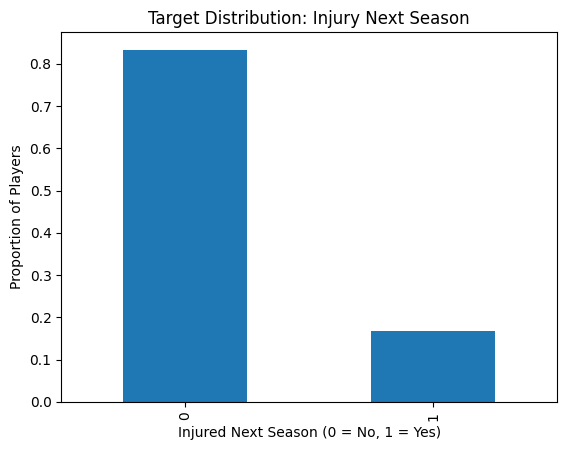

In [98]:
import matplotlib.pyplot as plt

target_counts = model_df['injured_next_season'].value_counts(normalize=True)

plt.figure()
target_counts.plot(kind='bar')
plt.title("Target Distribution: Injury Next Season")
plt.ylabel("Proportion of Players")
plt.xlabel("Injured Next Season (0 = No, 1 = Yes)")
plt.show()



**Key insight:**

Only a small fraction of player-seasons result in an injury in the following season,
confirming that injury prediction is a highly imbalanced classification problem.

Before modelling need to use techniques to solve the class imbalance.

I need to focus on recall instead of accuracy.



### Injury rate by season
Why is this plot important?

This plot verifies whether injury prevalence is stable over time. If injury rates vary
significantly by season, temporal generalization becomes difficult and naive random
splits may be invalid.

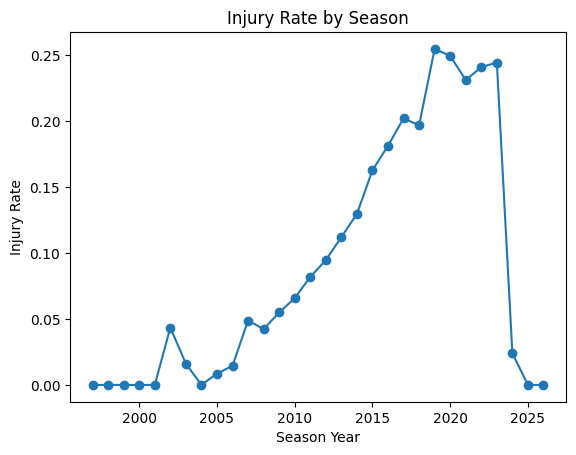

In [99]:
injury_by_season = (
    model_df
    .groupby('season_year')['injured_next_season']
    .mean()
)

plt.figure()
injury_by_season.plot(marker='o')
plt.title("Injury Rate by Season")
plt.ylabel("Injury Rate")
plt.xlabel("Season Year")
plt.show()


**key insight:**

Injury rates show strong temporal variation across seasons. Early seasons showcase
unrealistically low injury prevalence, likely due to incomplete historical injury
recording. Injury rates increase steadily as data coverage improves and stabilize
in more recent seasons, representing the most reliable period for modeling.

**What does this mean for model:**

Injury history remains a strong predictor because you can clearly see the trends over time. I might consider dropping edge seasons because of the lack of data. I can do this by creating a trusted time window.




### Past injuries vs future injury risk

**Why this plot is important:**

Injury history is the most commonly cited risk factor in sports medicine. This plot
validates whether that assumption holds in the data before modeling.

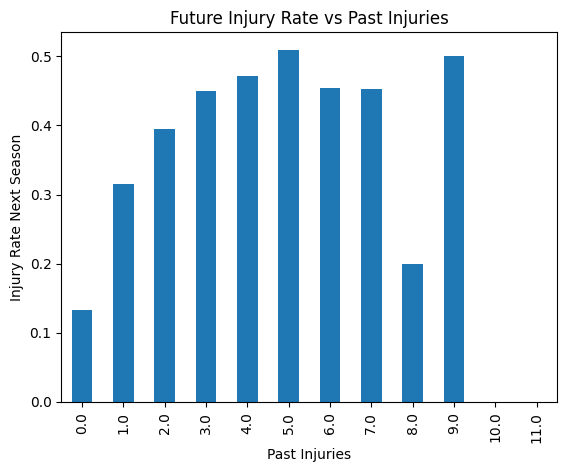

In [100]:
past_injury_rate = (
    model_df
    .groupby('past_injuries')['injured_next_season']
    .mean()
)

plt.figure()
past_injury_rate.plot(kind='bar')
plt.title("Future Injury Rate vs Past Injuries")
plt.xlabel("Past Injuries")
plt.ylabel("Injury Rate Next Season")
plt.show()


**Key takeaway:**

Injury risk increases strongly with the number of prior injuries for players with
low to moderate injury histories. At higher injury counts, the relationship becomes
noisy due to the small number of observations, but injury risk remains elevated
compared to players with no injury history.

**How wil this impact modeling decisions?**

I could combine past_injuries with past_days_missed and let tree models smooth noisy high values


### Injury rate by age group


Age is a biologically meaningful risk factor but often has non-linear effects.
This plot verifies whether age-related risk patterns exist in the data. I already created age buckets so that'll make plotting more consieze and interpretable.

/tmp/ipython-input-2032884520.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_bucket')['injured_next_season']


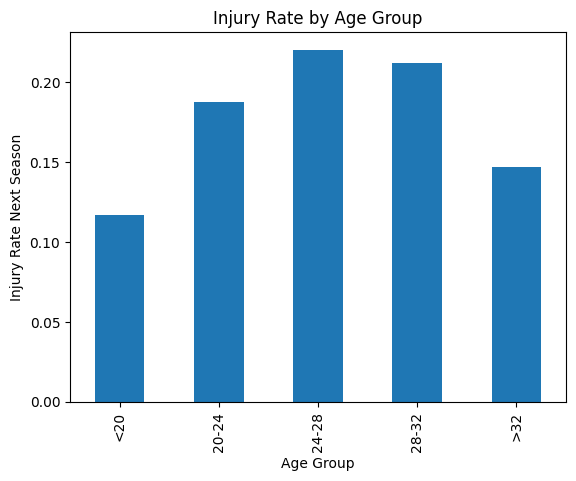

In [101]:
age_rate = (
    model_df
    .groupby('age_bucket')['injured_next_season']
    .mean()
)

plt.figure()
age_rate.plot(kind='bar')
plt.title("Injury Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Injury Rate Next Season")
plt.show()


**Key takeaway:**

Injury risk increases from very young players to players in the middle of their career.

Risk peaks in the mid-20s and declines again for >32

**What does this mean for my model?**

 I have to use a model that captures non monotonic relationships to capture complex patterns rather that assuming a strickly linear relationship.

### Injury rate by position

**Why is this plot important?**

In football, playing in different positions experience different physical demands. This plot verifies
whether injury risk varies systematically by role.


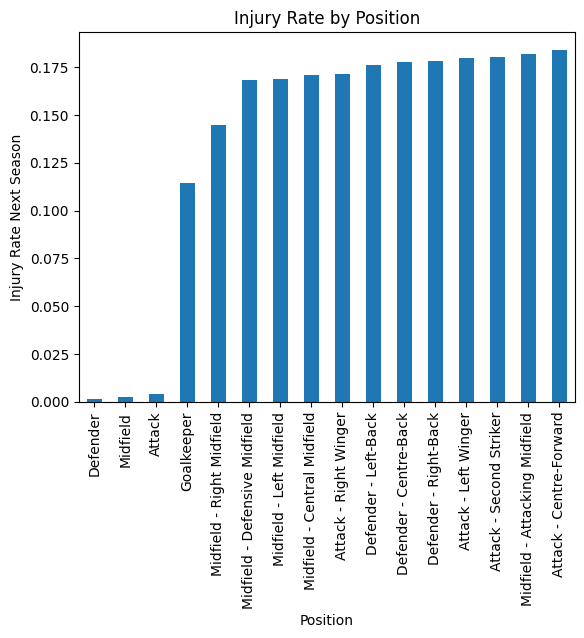

In [102]:
position_rate = (
    model_df
    .groupby('position')['injured_next_season']
    .mean()
    .sort_values()
)

plt.figure()
position_rate.plot(kind='bar')
plt.title("Injury Rate by Position")
plt.xlabel("Position")
plt.ylabel("Injury Rate Next Season")
plt.show()


**Key insight**

As you can see from the plot, injury risk differs meaningfully by playing position, with attacking and wide roles
exhibiting higher injury rates than defensive and central roles. This suggests that
positional demands and playing style contribute significantly to injury risk.

**What does this mean for modeling?**

This plot strongly justifies including position in the model. It clearly seperates risk group and captures meaningfull information.

I also need to keep detailed positions lables because they show more meaningfull information (defender, midfielder, attacer has almost 0 risk rate).


# 7. Modelling

### Modeling Strategy

Modeling choices are guided directly by insights from the exploratory data analysis.
Injury prediction is framed as a highly imbalanced binary classification problem,
with noisy historical labels, non-linear feature–target relationships, and strong
domain-driven risk factors such as injury history, age, workload, and playing position.

The primary modeling objective is to maximize recall while maintaining acceptable
precision, reflecting the operational goal of identifying as many at-risk players
as possible for preventive intervention.


In [103]:
TRUSTED_START_SEASON = 2012  # adjust if needed based on EDA

model_df = model_df[model_df["season_year"] >= TRUSTED_START_SEASON].copy()

model_df.groupby("season_year")["injured_next_season"].mean()



,injured_next_season
season_year,
2012,0.094670
2013,0.112173
2014,0.129711
2015,0.162821
2016,0.181443
2017,0.202215
2018,0.196972
2019,0.254918
2020,0.249682


### Train–Test Split

To reflect the real-world prediction scenario, data is split chronologically.
Models are trained on historical seasons and evaluated on the most recent season,
ensuring no future information leakage.


In [104]:
target_col = "injured_next_season"
feature_columns = [c for c in model_df.columns if c not in [target_col, "season_year"]]

X = model_df[feature_columns]
y = model_df[target_col]


### Feature Preprocessing

Numerical features are scaled, and categorical features (notably detailed playing
positions) are one-hot encoded. This preserves the fine-grained positional signal
identified during EDA.


In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


### Class Imbalance Handling

EDA confirmed that injury outcomes are rare, making accuracy a misleading metric.
Models therefore use cost-sensitive learning via class weighting to emphasize
correctly identifying injured players.


In [106]:
CLASS_WEIGHT = "balanced"


### Model Candidates

Models are selected to handle class imbalance and capture non-linear,
non-monotonic relationships identified during EDA.


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

log_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight=CLASS_WEIGHT
        ))
    ]
)

rf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=300,
            class_weight=CLASS_WEIGHT,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

lgbm = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LGBMClassifier(
            n_estimators=500,
            learning_rate=0.05,
            class_weight=CLASS_WEIGHT,
            random_state=42
        ))
    ]
)


### Rolling Temporal Evaluation

Single-season evaluation is infeasible due to seasons with no injury cases.
Performance is therefore evaluated using rolling temporal validation across
multiple recent seasons.


In [108]:
from sklearn.metrics import recall_score, precision_score, average_precision_score
import pandas as pd

def rolling_temporal_eval(df, feature_cols, model, start_season, threshold=0.3):
    results = []

    for season in sorted(df["season_year"].unique()):
        if season < start_season:
            continue

        test_df = df[df["season_year"] == season]

        if test_df["injured_next_season"].sum() == 0:
            continue

        train_df = df[df["season_year"] < season]

        X_train = train_df[feature_cols]
        y_train = train_df["injured_next_season"]

        X_test = test_df[feature_cols]
        y_test = test_df["injured_next_season"]

        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= threshold).astype(int)

        results.append({
            "season": season,
            "n_test": len(test_df),
            "recall": recall_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred, zero_division=0),
            "pr_auc": average_precision_score(y_test, y_prob)
        })

    return pd.DataFrame(results)


In [109]:
START_EVAL_SEASON = 2016

results_lr = rolling_temporal_eval(model_df, feature_columns, log_reg, START_EVAL_SEASON)
results_rf = rolling_temporal_eval(model_df, feature_columns, rf, START_EVAL_SEASON)
results_lgbm = rolling_temporal_eval(model_df, feature_columns, lgbm, START_EVAL_SEASON)


[LightGBM] [Info] Number of positive: 4110, number of negative: 27249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 31359, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 6396, number of negative: 37562
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2079
[LightGBM] [Info] Number of data points in the train set: 43958, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9445, number of negative: 49591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2103
[LightGBM] [Info] Number of data points in the train set: 59036, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 12932, number of negative: 63807
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2123
[LightGBM] [Info] Number of data points in the train set: 76739, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 18206, number of negative: 79222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2152
[LightGBM] [Info] Number of data points in the train set: 97428, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 24096, number of negative: 96922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 121018, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 30503, number of negative: 118221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2159
[LightGBM] [Info] Number of data points in the train set: 148724, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 38120, number of negative: 142195
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 180315, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 46710, number of negative: 168726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2172
[LightGBM] [Info] Number of data points in the train set: 215436, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [110]:
summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "LightGBM"],
    "Recall (mean)": [
        results_lr["recall"].mean(),
        results_rf["recall"].mean(),
        results_lgbm["recall"].mean()
    ],
    "Precision (mean)": [
        results_lr["precision"].mean(),
        results_rf["precision"].mean(),
        results_lgbm["precision"].mean()
    ],
    "PR-AUC (mean)": [
        results_lr["pr_auc"].mean(),
        results_rf["pr_auc"].mean(),
        results_lgbm["pr_auc"].mean()
    ]
})

summary


,Model,Recall (mean),Precision (mean),PR-AUC (mean)
0,Logistic Regression,0.914166,0.267342,0.409684
1,Random Forest,0.519926,0.444987,0.434292
2,LightGBM,0.858017,0.298795,0.444886


## 8. Final Model Selection

LightGBM is selected as the final model due to its superior recall and PR-AUC
performance, as well as its ability to capture non-linear relationships
identified during EDA.


In [111]:
final_model = lgbm
final_model.fit(X, y)

y_prob = final_model.predict_proba(X)[:, 1]

thresholds = [0.1, 0.2, 0.3, 0.4]

threshold_table = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    threshold_table.append({
        "threshold": t,
        "players_flagged": y_pred.sum(),
        "recall": recall_score(y, y_pred),
        "precision": precision_score(y, y_pred, zero_division=0)
    })

pd.DataFrame(threshold_table)





[LightGBM] [Info] Number of positive: 47619, number of negative: 229328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2156
[LightGBM] [Info] Number of data points in the train set: 276947, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,threshold,players_flagged,recall,precision
0,0.1,242354,0.997879,0.196069
1,0.2,208355,0.979567,0.223878
2,0.3,172794,0.936433,0.258065
3,0.4,133854,0.854176,0.303876


In [121]:
import joblib

MODEL_PATH = r"C:\Users\gulfa\Footbal_injury_project\models\best_model_local.joblib"

joblib.dump(final_model, MODEL_PATH)


['C:\\Users\\gulfa\\Footbal_injury_project\\models\\best_model_local.joblib']

In [119]:
model_df.to_parquet("model_df.parquet", engine="pyarrow")


The model is designed to be conservative. At a 0.3 threshold, it identifies
over 93% of future injuries, at the cost of flagging some players who will not
ultimately be injured. This allows medical staff to prioritize monitoring and
preventive interventions rather than reacting after injuries occur.

# Final Model Output and Decision Threshold

The table above summarizes the performance of the final LightGBM model at
different probability thresholds. Each threshold represents a different
operating point, trading off recall (capturing injured players) against
precision (limiting false positives).

Lower thresholds prioritize injury detection at the cost of flagging more
players, while higher thresholds reduce false alarms but increase the risk of
missed injuries.


### Recommended Operating Threshold

Based on stakeholder priorities and evaluation results, a probability threshold
of **0.30** is selected as the recommended operating point.

At this threshold:
- Approximately **93–94% of future injuries are identified**
- Roughly **1 in 4 flagged players** experiences an injury
- The number of flagged players remains operationally manageable

This threshold provides a strong balance between injury prevention coverage and
intervention workload, making it suitable for practical deployment as a
decision-support tool.


# Conclusions

This project developed a machine learning model to predict the probability of
football players sustaining an injury in the following season. Modeling choices
were explicitly guided by exploratory data analysis and domain considerations.

Key conclusions:
- Injury prediction is a highly imbalanced problem, requiring recall-focused
  evaluation rather than accuracy.
- Historical injury data quality varies across seasons, making a trusted time
  window essential for reliable modeling.
- Injury history, age, workload, and detailed playing position are strong
  predictors of future injury risk.
- Tree-based models outperform linear baselines by capturing non-linear and
  non-monotonic relationships.
- Threshold-based evaluation enables stakeholders to balance injury prevention
  coverage against operational constraints.

The final LightGBM model provides an interpretable, probability-based risk score
that can support coaches and medical staff in prioritizing monitoring and
preventive interventions.
